In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from recompile import Load, Save

# Constants

In [3]:
Mp = 0.938272081
Mn = 0.939565413
mup = 2.7928473446
mun = -1.9130427

In [4]:
def fm2GeV(var, power):
    hbar = 0.1973269788
    return var * hbar ** power

In [5]:
def G_D(Q2):
    return np.power(1.0 + Q2/0.71, -2)

# Prepare

In [187]:
test = pd.read_table('{:0>4d}.dat'.format(19), delim_whitespace=True, skiprows = 8, header = [0,1])
test.head()

,Q2,G_En^2,err_total
,GeV^2,1,1
0,0.214,0.002,0.0048
1,0.389,-0.003,0.0090
2,0.389,-0.008,0.0070
3,0.565,-0.004,0.0060
4,0.600,-0.200,0.0060


# Load data

In [2]:
data0 = [] # mu*G_Ep/G_Mp
data1 = [] # G_Ep/G_D
data2 = [] # G_Mp/mu/G_D
data3 = [] # mu*G_En/G_Mn
data4 = [] # G_En
data5 = [] # G_Mn/mu/G_D
data6 = [] # Q^4*F_1p
data7 = [] # Q^2*F_2p/F_1p
data8 = [] # F_2p/G_D
data9 = [] # sigma/sigma_D
for i in [1,2,3,4,5,6,11,12,16,17,31,37,40,46,51,52,53,54,55,]:
    data0.append(Load(i))
for i in [7,9,14,21,23,26,29,35,38,76,78]:
    data1.append(Load(i))
for i in [8,10,13,15,18,22,24,27,30,36,39]:
    data2.append(Load(i))
for i in [57,60,74]:
    data3.append(Load(i))
for i in [41,42,43,44,45,47,48,49,50,56,58,59,61]:
    data4.append(Load(i))
for i in [20,62,63,64,65,66,67,68,69,70,72,73]:
    data5.append(Load(i))
for i in [25,32]:
    data6.append(Load(i))
for i in [28,34]:
    data7.append(Load(i))
for i in [33,]:
    data8.append(Load(i))
for i in [75,77]:
    data9.append(Load(i))
test0 = pd.concat(data0, ignore_index=True)
test1 = pd.concat(data1, ignore_index=True)
test2 = pd.concat(data2, ignore_index=True)
test3 = pd.concat(data3, ignore_index=True)
test4 = pd.concat(data4, ignore_index=True)
test5 = pd.concat(data5, ignore_index=True)
test6 = pd.concat(data6, ignore_index=True)
test7 = pd.concat(data7, ignore_index=True)
test8 = pd.concat(data8, ignore_index=True)
test9 = pd.concat(data9, ignore_index=True)

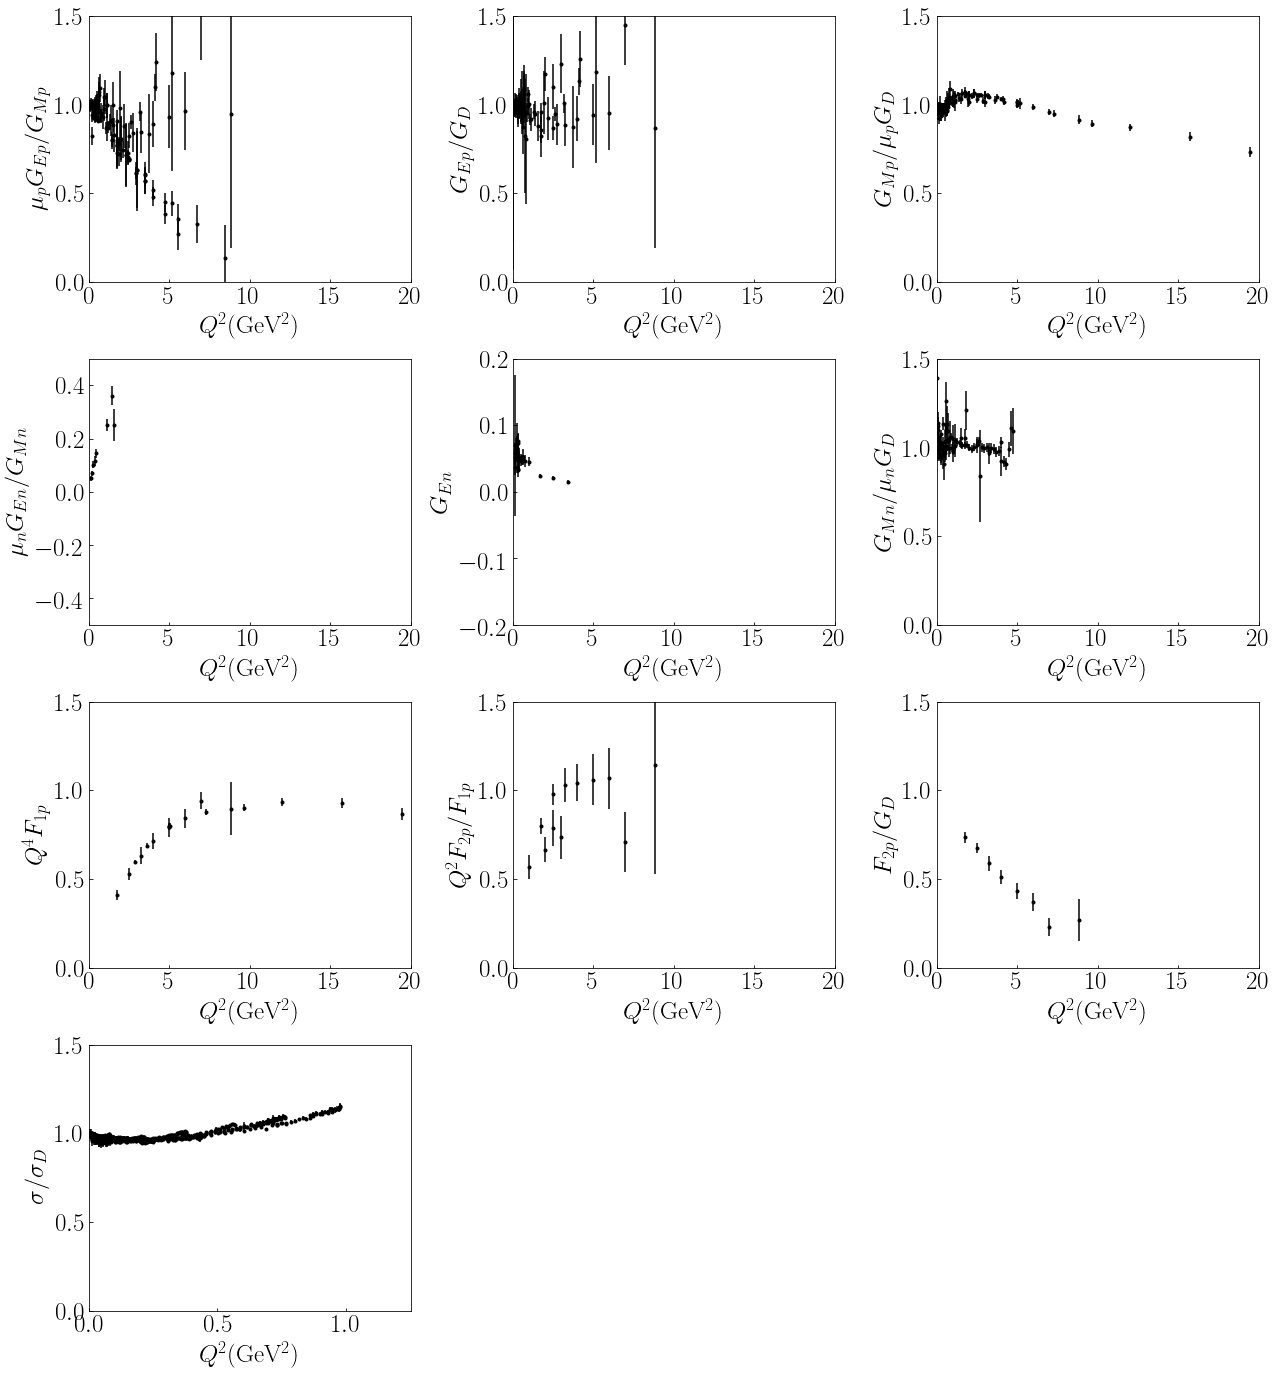

In [3]:
nrows, ncols = 4, 3

fig = plt.figure(figsize=(ncols*6, nrows*6*0.8))
ax = fig.add_subplot(nrows, ncols, 1)
ax.errorbar(test0['Q2'], test0['mu*G_Ep/G_Mp'], yerr=test0['error'], marker='.', linestyle='', color = 'black')
ax.set_xlim(0,20)
ax.set_ylim(0,1.5)
ax.set_xlabel(r'$Q^2\rm(GeV^2)$', size=25)
ax.set_ylabel(r'$\mu_p G_{Ep}/G_{Mp}$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

ax = fig.add_subplot(nrows, ncols, 2)
ax.errorbar(test1['Q2'], test1['G_Ep/G_D'], yerr=test1['error'], marker='.', linestyle='', color = 'black')
ax.set_xlim(0,20)
ax.set_ylim(0,1.5)
ax.set_xlabel(r'$Q^2\rm(GeV^2)$', size=25)
ax.set_ylabel(r'$G_{Ep}/G_D$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

ax = fig.add_subplot(nrows, ncols, 3)
ax.errorbar(test2['Q2'], test2['G_Mp/mu/G_D'], yerr=test2['error'], marker='.', linestyle='', color = 'black')
ax.set_xlim(0,20)
ax.set_ylim(0,1.5)
ax.set_xlabel(r'$Q^2\rm(GeV^2)$', size=25)
ax.set_ylabel(r'$G_{Mp}/\mu_p G_D$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

ax = fig.add_subplot(nrows, ncols, 4)
ax.errorbar(test3['Q2'], test3['mu*G_En/G_Mn'], yerr=test3['error'], marker='.', linestyle='', color = 'black')
ax.set_xlim(0,20)
ax.set_ylim(-0.5,0.5)
ax.set_xlabel(r'$Q^2\rm(GeV^2)$', size=25)
ax.set_ylabel(r'$\mu_nG_{En}/G_{Mn}$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

ax = fig.add_subplot(nrows, ncols, 5)
ax.errorbar(test4['Q2'], test4['G_En'], yerr=test4['error'], marker='.', linestyle='', color = 'black')
ax.set_xlim(0,20)
ax.set_ylim(-0.2,0.2)
ax.set_xlabel(r'$Q^2\rm(GeV^2)$', size=25)
ax.set_ylabel(r'$G_{En}$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

ax = fig.add_subplot(nrows, ncols, 6)
ax.errorbar(test5['Q2'], test5['G_Mn/mu/G_D'], yerr=test5['error'], marker='.', linestyle='', color = 'black')
ax.set_xlim(0,20)
ax.set_ylim(0,1.5)
ax.set_xlabel(r'$Q^2\rm(GeV^2)$', size=25)
ax.set_ylabel(r'$G_{Mn}/\mu_n G_D$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

ax = fig.add_subplot(nrows, ncols, 7)
ax.errorbar(test6['Q2'], test6['Q^4*F_1p'], yerr=test6['error'], marker='.', linestyle='', color = 'black')
ax.set_xlim(0,20)
ax.set_ylim(0,1.5)
ax.set_xlabel(r'$Q^2\rm(GeV^2)$', size=25)
ax.set_ylabel(r'$Q^4 F_{1p}$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

ax = fig.add_subplot(nrows, ncols, 8)
ax.errorbar(test7['Q2'], test7['Q^2*F_2p/F_1p'], yerr=test7['error'], marker='.', linestyle='', color = 'black')
ax.set_xlim(0,20)
ax.set_ylim(0,1.5)
ax.set_xlabel(r'$Q^2\rm(GeV^2)$', size=25)
ax.set_ylabel(r'$Q^2 F_{2p}/F_{1p}$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

ax = fig.add_subplot(nrows, ncols, 9)
ax.errorbar(test8['Q2'], test8['F_2p/G_D'], yerr=test8['error'], marker='.', linestyle='', color = 'black')
ax.set_xlim(0,20)
ax.set_ylim(0,1.5)
ax.set_xlabel(r'$Q^2\rm(GeV^2)$', size=25)
ax.set_ylabel(r'$F_{2p}/G_D$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)

ax = fig.add_subplot(nrows, ncols, 10)
ax.errorbar(test9['Q2'], test9['sigma/sigma_D'], yerr=test9['error'], marker='.', linestyle='', color = 'black')
ax.set_xlim(0,1.25)
ax.set_ylim(0,1.5)
ax.set_xlabel(r'$Q^2\rm(GeV^2)$', size=25)
ax.set_ylabel(r'$\sigma/\sigma_D$', size=25)
ax.tick_params(axis='both', which='both', direction='in', labelsize=25)


fig.tight_layout()

# Save recompile

In [3]:
for i in [1,2,3,4,5,6,11,12,16,17,31,37,40,46,51,52,53,54,55,]:
    Save(Load(i), 'r{:0>4d}.dat'.format(i))
for i in [7,9,14,21,23,26,29,35,38,76,78]:
    Save(Load(i), 'r{:0>4d}.dat'.format(i))
for i in [8,10,13,15,18,22,24,27,30,36,39]:
    Save(Load(i), 'r{:0>4d}.dat'.format(i))
for i in [57,60,74]:
    Save(Load(i), 'r{:0>4d}.dat'.format(i))
for i in [41,42,43,44,45,47,48,49,50,56,58,59,61]:
    Save(Load(i), 'r{:0>4d}.dat'.format(i))
for i in [20,62,63,64,65,66,67,68,69,70,72,73]:
    Save(Load(i), 'r{:0>4d}.dat'.format(i))
for i in [25,32]:
    Save(Load(i), 'r{:0>4d}.dat'.format(i))
for i in [28,34]:
    Save(Load(i), 'r{:0>4d}.dat'.format(i))
for i in [33,]:
    Save(Load(i), 'r{:0>4d}.dat'.format(i))
for i in [75,77]:
    Save(Load(i), 'r{:0>4d}.dat'.format(i))

r0001.dat saved
r0002.dat saved
r0003.dat saved
r0004.dat saved
r0005.dat saved
r0006.dat saved
r0011.dat saved
r0012.dat saved
r0016.dat saved
r0017.dat saved
r0031.dat saved
r0037.dat saved
r0040.dat saved
r0046.dat saved
r0051.dat saved
r0052.dat saved
r0053.dat saved
r0054.dat saved
r0055.dat saved
r0007.dat saved
r0009.dat saved
r0014.dat saved
r0021.dat saved
r0023.dat saved
r0026.dat saved
r0029.dat saved
r0035.dat saved
r0038.dat saved
r0076.dat saved
r0078.dat saved
r0008.dat saved
r0010.dat saved
r0013.dat saved
r0015.dat saved
r0018.dat saved
r0022.dat saved
r0024.dat saved
r0027.dat saved
r0030.dat saved
r0036.dat saved
r0039.dat saved
r0057.dat saved
r0060.dat saved
r0074.dat saved
r0041.dat saved
r0042.dat saved
r0043.dat saved
r0044.dat saved
r0045.dat saved
r0047.dat saved
r0048.dat saved
r0049.dat saved
r0050.dat saved
r0056.dat saved
r0058.dat saved
r0059.dat saved
r0061.dat saved
r0020.dat saved
r0062.dat saved
r0063.dat saved
r0064.dat saved
r0065.dat saved
r0066.da

In [4]:
Save(test0, 'c001.dat')
Save(test1, 'c002.dat')
Save(test2, 'c003.dat')
Save(test3, 'c004.dat')
Save(test4, 'c005.dat')
Save(test5, 'c006.dat')
Save(test6, 'c007.dat')
Save(test7, 'c008.dat')
Save(test8, 'c009.dat')
Save(test9, 'c010.dat')

c001.dat saved
c002.dat saved
c003.dat saved
c004.dat saved
c005.dat saved
c006.dat saved
c007.dat saved
c008.dat saved
c009.dat saved
c010.dat saved


# plots

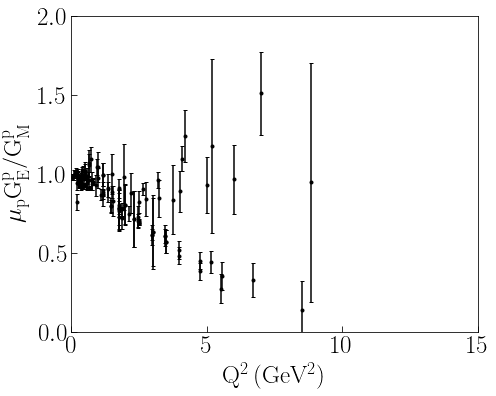

In [25]:
dd = pd.read_table('c001.dat', delim_whitespace=True, skiprows=0, header=0)
nrows, ncols = 1, 1
fig = plt.figure(figsize=(ncols*7, nrows*7*0.8))
ax = fig.add_subplot(nrows, ncols, 1)
ax.errorbar(dd['Q2'], dd['mu*G_Ep/G_Mp'], yerr=dd['error'], marker='.', capsize=2, linestyle='', color='black')
ax.set_xlim(0, 15)
ax.set_ylim(0, 2)
ax.set_xlabel(r'$\rm Q^2\,(GeV^2)$', size=25)
ax.set_ylabel(r'$\rm \mu_pG_{E}^p/G_M^p$', size=25)
ax.tick_params(axis='both', which='both', direction='in', length=6, labelsize=25)

fig.tight_layout()
fig.savefig('plots/c001.pdf')

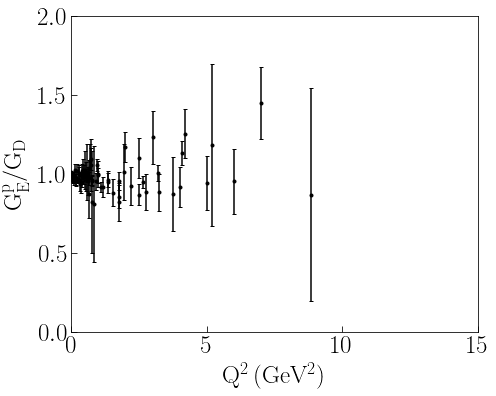

In [5]:
dd = pd.read_table('c002.dat', delim_whitespace=True, skiprows=0, header=0)
nrows, ncols = 1, 1
fig = plt.figure(figsize=(ncols*7, nrows*7*0.8))
ax = fig.add_subplot(nrows, ncols, 1)
ax.errorbar(dd['Q2'], dd['G_Ep/G_D'], yerr=dd['error'], marker='.', capsize=2, linestyle='', color='black')
ax.set_xlim(0, 15)
ax.set_ylim(0, 2)
ax.set_xlabel(r'$\rm Q^2\,(GeV^2)$', size=25)
ax.set_ylabel(r'$\rm G_{E}^p/G_D$', size=25)
ax.tick_params(axis='both', which='both', direction='in', length=6, labelsize=25)

fig.tight_layout()
fig.savefig('plots/c002.pdf')

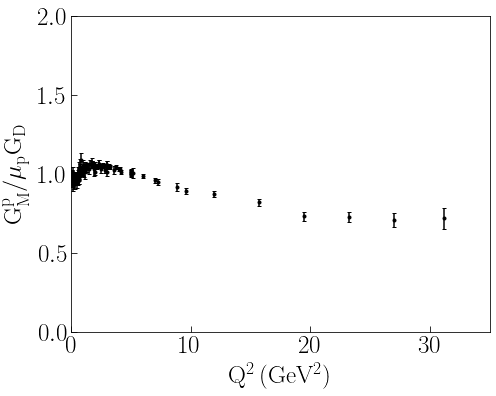

In [32]:
dd = pd.read_table('c003.dat', delim_whitespace=True, skiprows=0, header=0)
nrows, ncols = 1, 1
fig = plt.figure(figsize=(ncols*7, nrows*7*0.8))
ax = fig.add_subplot(nrows, ncols, 1)
ax.errorbar(dd['Q2'], dd['G_Mp/mu/G_D'], yerr=dd['error'], marker='.', capsize=2, linestyle='', color='black')
ax.set_xlim(0, 35)
ax.set_ylim(0, 2)
ax.set_xlabel(r'$\rm Q^2\,(GeV^2)$', size=25)
ax.set_ylabel(r'$\rm G_{M}^p/\mu_pG_D$', size=25)
ax.tick_params(axis='both', which='both', direction='in', length=6, labelsize=25)

fig.tight_layout()
fig.savefig('plots/c003.pdf')

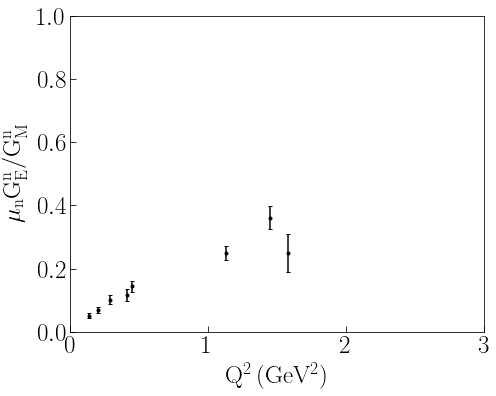

In [34]:
dd = pd.read_table('c004.dat', delim_whitespace=True, skiprows=0, header=0)
nrows, ncols = 1, 1
fig = plt.figure(figsize=(ncols*7, nrows*7*0.8))
ax = fig.add_subplot(nrows, ncols, 1)
ax.errorbar(dd['Q2'], dd['mu*G_En/G_Mn'], yerr=dd['error'], marker='.', capsize=2, linestyle='', color='black')
ax.set_xlim(0, 3)
ax.set_ylim(0, 1)
ax.set_xlabel(r'$\rm Q^2\,(GeV^2)$', size=25)
ax.set_ylabel(r'$\rm \mu_nG_{E}^n/G_M^n$', size=25)
ax.tick_params(axis='both', which='both', direction='in', length=6, labelsize=25)

fig.tight_layout()
fig.savefig('plots/c004.pdf')

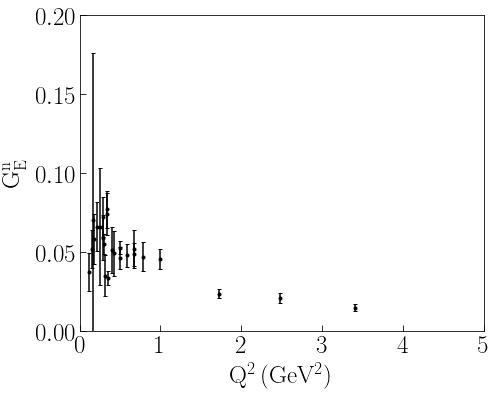

In [37]:
dd = pd.read_table('c005.dat', delim_whitespace=True, skiprows=0, header=0)
nrows, ncols = 1, 1
fig = plt.figure(figsize=(ncols*7, nrows*7*0.8))
ax = fig.add_subplot(nrows, ncols, 1)
ax.errorbar(dd['Q2'], dd['G_En'], yerr=dd['error'], marker='.', capsize=2, linestyle='', color='black')
ax.set_xlim(0, 5)
ax.set_ylim(0, 0.2)
ax.set_xlabel(r'$\rm Q^2\,(GeV^2)$', size=25)
ax.set_ylabel(r'$\rm G_{E}^n$', size=25)
ax.tick_params(axis='both', which='both', direction='in', length=6, labelsize=25)

fig.tight_layout()
fig.savefig('plots/c005.pdf')

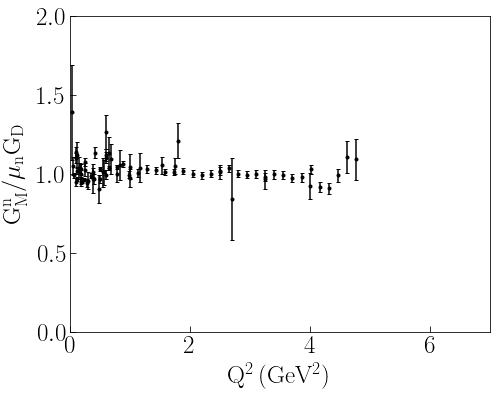

In [8]:
dd = pd.read_table('c006.dat', delim_whitespace=True, skiprows=0, header=0)
nrows, ncols = 1, 1
fig = plt.figure(figsize=(ncols*7, nrows*7*0.8))
ax = fig.add_subplot(nrows, ncols, 1)
ax.errorbar(dd['Q2'], dd['G_Mn/mu/G_D'], yerr=dd['error'], marker='.', capsize=2, linestyle='', color='black')
ax.set_xlim(0, 7)
ax.set_ylim(0, 2)
ax.set_xlabel(r'$\rm Q^2\,(GeV^2)$', size=25)
ax.set_ylabel(r'$\rm G_{M}^n/\mu_nG_D$', size=25)
ax.tick_params(axis='both', which='both', direction='in', length=6, labelsize=25)

fig.tight_layout()
fig.savefig('plots/c006.pdf')

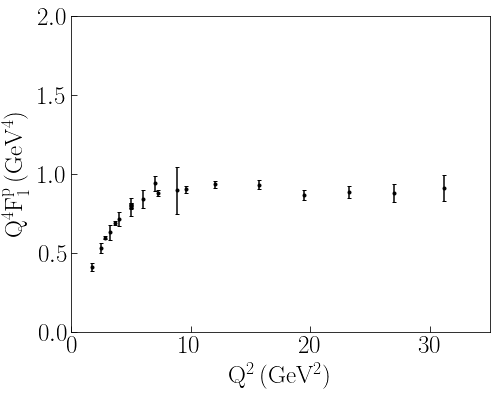

In [10]:
dd = pd.read_table('c007.dat', delim_whitespace=True, skiprows=0, header=0)
nrows, ncols = 1, 1
fig = plt.figure(figsize=(ncols*7, nrows*7*0.8))
ax = fig.add_subplot(nrows, ncols, 1)
ax.errorbar(dd['Q2'], dd['Q^4*F_1p'], yerr=dd['error'], marker='.', capsize=2, linestyle='', color='black')
ax.set_xlim(0, 35)
ax.set_ylim(0, 2)
ax.set_xlabel(r'$\rm Q^2\,(GeV^2)$', size=25)
ax.set_ylabel(r'$\rm Q^4 F_1^p\,(GeV^4)$', size=25)
ax.tick_params(axis='both', which='both', direction='in', length=6, labelsize=25)

fig.tight_layout()
fig.savefig('plots/c007.pdf')

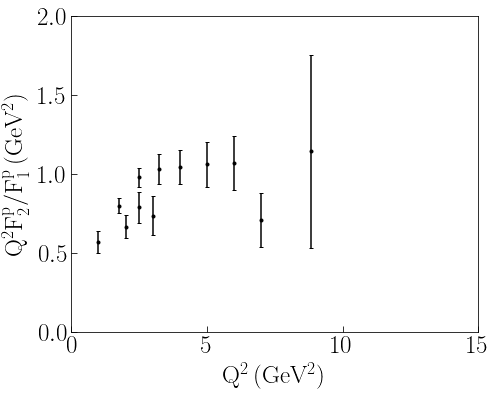

In [14]:
dd = pd.read_table('c008.dat', delim_whitespace=True, skiprows=0, header=0)
nrows, ncols = 1, 1
fig = plt.figure(figsize=(ncols*7, nrows*7*0.8))
ax = fig.add_subplot(nrows, ncols, 1)
ax.errorbar(dd['Q2'], dd['Q^2*F_2p/F_1p'], yerr=dd['error'], marker='.', capsize=2, linestyle='', color='black')
ax.set_xlim(0, 15)
ax.set_ylim(0, 2)
ax.set_xlabel(r'$\rm Q^2\,(GeV^2)$', size=25)
ax.set_ylabel(r'$\rm Q^2F_2^p/F_1^p\,(GeV^2)$', size=25)
ax.tick_params(axis='both', which='both', direction='in', length=6, labelsize=25)

fig.tight_layout()
fig.savefig('plots/c008.pdf')

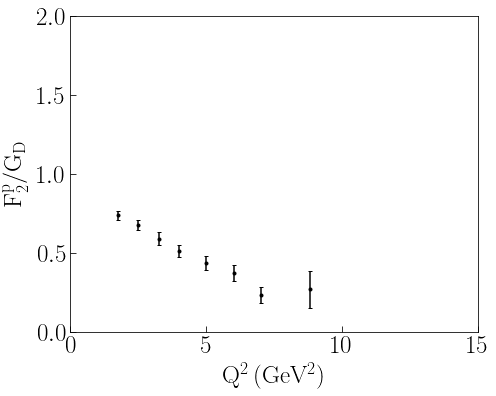

In [18]:
dd = pd.read_table('c009.dat', delim_whitespace=True, skiprows=0, header=0)
nrows, ncols = 1, 1
fig = plt.figure(figsize=(ncols*7, nrows*7*0.8))
ax = fig.add_subplot(nrows, ncols, 1)
ax.errorbar(dd['Q2'], dd['F_2p/G_D'], yerr=dd['error'], marker='.', capsize=2, linestyle='', color='black')
ax.set_xlim(0, 15)
ax.set_ylim(0, 2)
ax.set_xlabel(r'$\rm Q^2\,(GeV^2)$', size=25)
ax.set_ylabel(r'$\rm F_2^p/G_D$', size=25)
ax.tick_params(axis='both', which='both', direction='in', length=6, labelsize=25)

fig.tight_layout()
fig.savefig('plots/c009.pdf')

In [4]:
Save(Load(78), 'r{:0>4d}.dat'.format(78))

r0078.dat saved


In [5]:
Save(test1, 'c002.dat')

c002.dat saved
